# HR Analytics Project- Understanding the Attrition in HR

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
# First Let's import basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
data = pd.read_csv('D:\DATA SC_Practice Project\\eva\\WA_Fn-UseC_-HR-Employee-Attrition.csv')
print("Total Number of samples: %d" % len(data))
data.head(5)

Total Number of samples: 1470


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape

(1470, 35)

There are 1470 Rows and 35 columns in this Data set

In [4]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Here we can see there is no missing values value.so we can proceed further

In [5]:
#lets chcek the datatypes
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

We have 1470 rows and 35 columns in the dataset. BusinessTravel,Attrition,Gender,Department,MaritalStatus,ovet time are objet type data. int..(26), object..(9)

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observations:- 1)There is no diifernce between mean and median(50%) in almost all of the column 2)Thers is large differnce between the values of 75% aand 'max' in some of the columns. **which show that there are outliers and sknweness in the dataset. 3) Age, hourly rate and employeeNumber has high standard deviation.

# EDA

<AxesSubplot:>

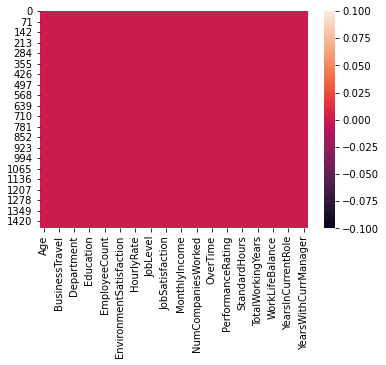

In [7]:
#let's check for heat map to see the correlation
sns.heatmap(data.isnull())

From the heat map we can conceive that there is no missing value present in the dataset.

In [8]:
# droping the column from dataset 
# Variables EmployeeCount, Over18, and StandardHours have a single value in the dataset and not contributing,So we should drop this column
data.drop(['StandardHours','EmployeeCount','Over18'],axis=1,inplace=True)

<AxesSubplot:>

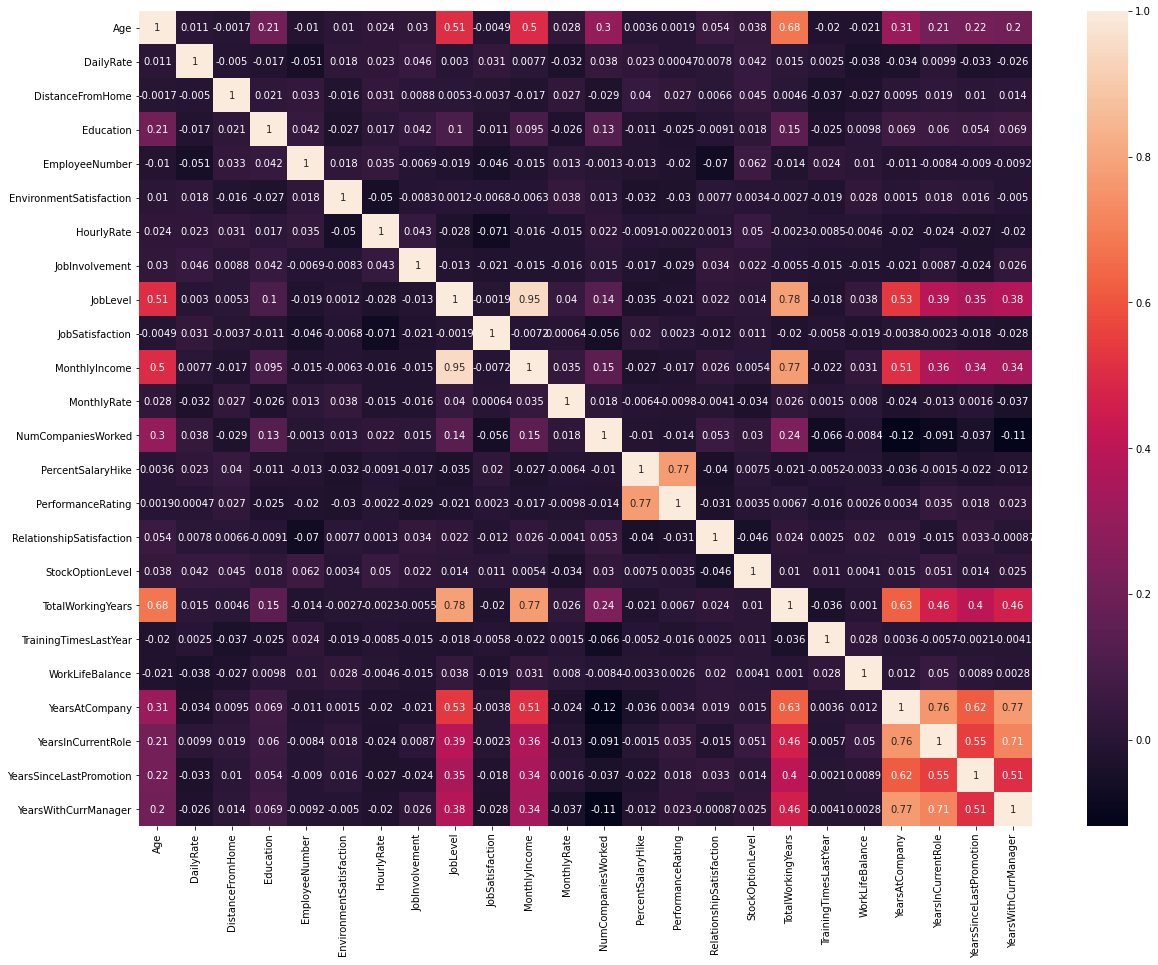

In [9]:
# Correlation 
fig =plt.figure(figsize=(20,15))
hc=data.corr(method='pearson')
sns.heatmap(hc,annot=True)

- observation: 
    - 1. Performance rating and percent slary hike is higgly correlated 
    - 2. Job Level& Monthly income has strong positive correlation. 
    - 3. Job level & working years has strong positive correlation.
    - 4. Age & distance from home has negative correlation.

In [10]:
# Here our Label is 'attrition' so let's understand it:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

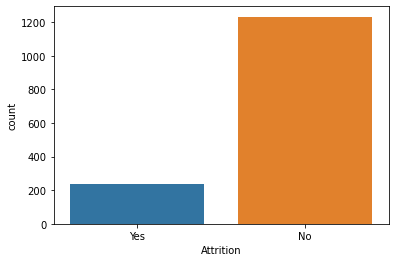

Attrition percentage is: 16.122448979591837


In [11]:
sns.countplot(x="Attrition",data=data)
plt.show()
# This see Overall Attrition percentage in the data given:
print("Attrition percentage is:",237/(1233+237)*100)

<AxesSubplot:xlabel='Age', ylabel='count'>

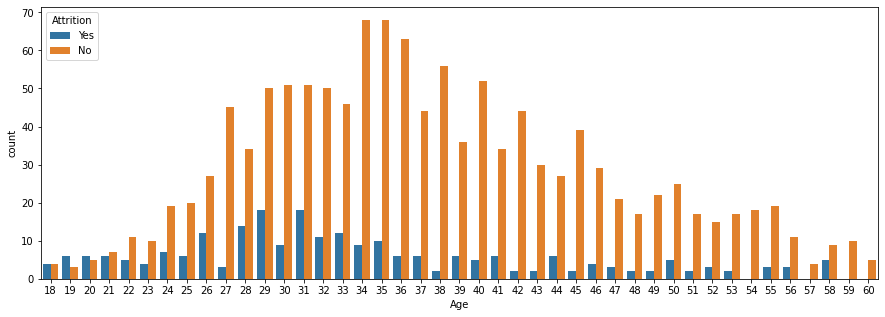

In [12]:
# Let's see the features:
# Age
plt.figure(figsize=(15,5))
sns.countplot(data.Age,hue=data.Attrition)

#From the Blue bars, we can conceive that the higher aged people have less attrition rates

<AxesSubplot:xlabel='Gender', ylabel='count'>

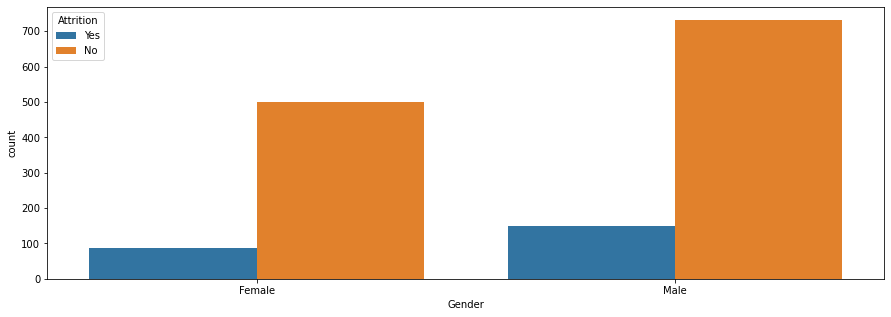

In [13]:
# Let's see the features:
# Gender
plt.figure(figsize=(15,5))
sns.countplot(data.Gender,hue=data.Attrition)

#From the blue bars, we can conceive that the female  has less attrition rates in comparision to male

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

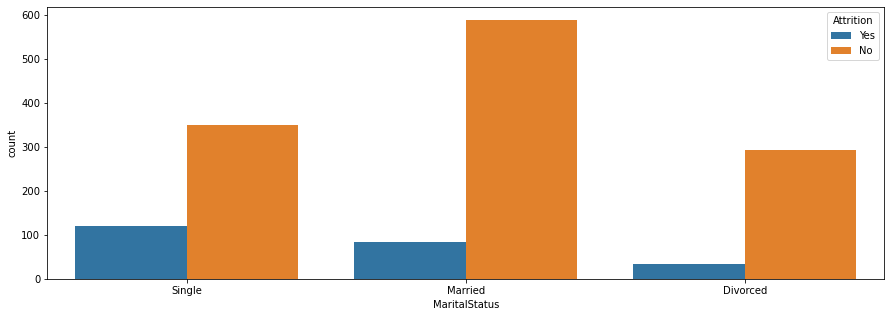

In [14]:
# Let's see the features:
# MaritalStatus
plt.figure(figsize=(15,5))
sns.countplot(data.MaritalStatus,hue=data.Attrition)

#From the Orange bars, we can conceive that the mariied people has higher attrition

# Outliers

In [15]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:>

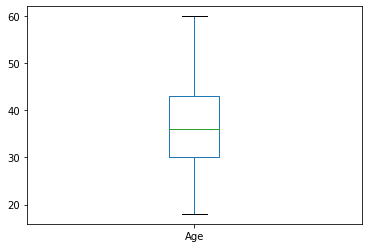

In [16]:
data['Age'].plot.box()

<AxesSubplot:>

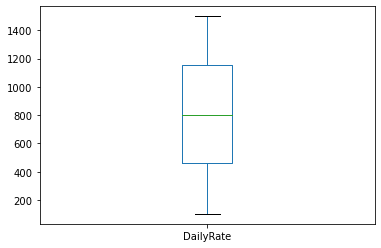

In [17]:
data['DailyRate'].plot.box()

<AxesSubplot:>

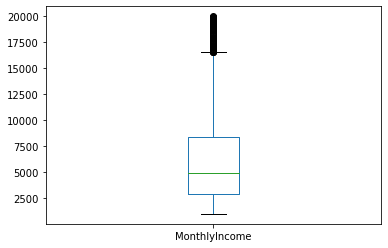

In [18]:
data['MonthlyIncome'].plot.box()

<AxesSubplot:>

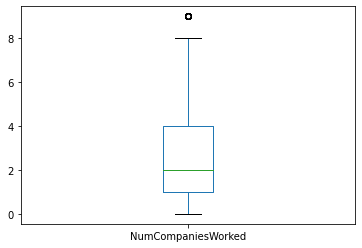

In [19]:
data['NumCompaniesWorked'].plot.box()

<AxesSubplot:>

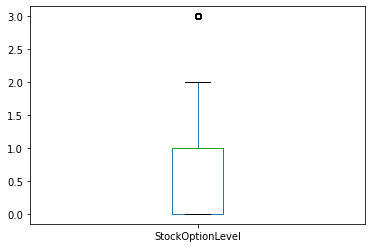

In [20]:
data['StockOptionLevel'].plot.box()

<AxesSubplot:>

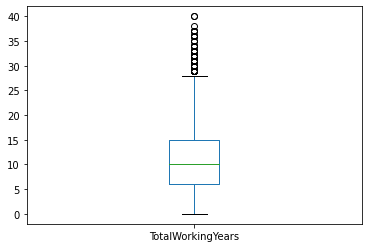

In [21]:
data['TotalWorkingYears'].plot.box()

<AxesSubplot:>

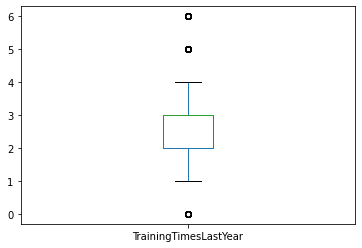

In [22]:
data['TrainingTimesLastYear'].plot.box()

- Observations-
    - There are outliers present in the MonthlyIncome,YearsWithCurrManager,YearsInCurrentRole,YearsAtCompany,TrainingTimesLastYear, TotalWorkingYears,PerformanceRating,NumCompaniesWorked. 
    - There are 24 numeric variable column uot of that in 10 variable we have found ouliers

In [71]:
# Data frame having int type variables having outliers
outliers=data[['MonthlyIncome']]

In [72]:
#Handling the Outliers.Removing the outliers.
from scipy.stats import zscore
z=np.abs(zscore(outliers))
z
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [73]:
# lets check the presence of outlier
print('shape before remooving the outliers:',data.shape)
data_new=data[(z<3).all(axis=1)]

print('shape after remooving the outliers:',data_new.shape)
# here 83 rows will be droped

shape before remooving the outliers: (1470, 32)
shape after remooving the outliers: (1470, 32)


# Skewness

In [74]:
data_new.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

Since we are accepting skewness +0.5/-0.5, still there are variables having skewness above this so we have to remove the skewness

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

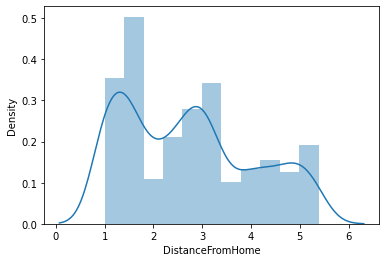

In [75]:
#Removing skewness
data_new['DistanceFromHome']=np.sqrt(data_new['DistanceFromHome'])
sns.distplot(data_new['DistanceFromHome'])

<AxesSubplot:xlabel='JobLevel', ylabel='Density'>

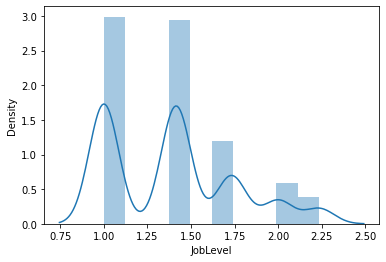

In [76]:
#Removing skewness
data_new['JobLevel']=np.sqrt(data_new['JobLevel'])
sns.distplot(data_new['JobLevel'])

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

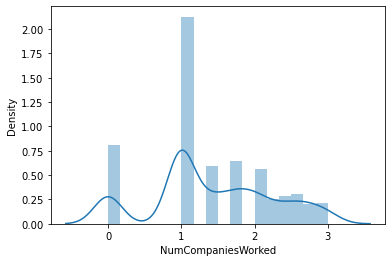

In [77]:
#Removing skewness 
data_new['NumCompaniesWorked']=np.sqrt(data_new['NumCompaniesWorked'])
sns.distplot(data_new['NumCompaniesWorked'])

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

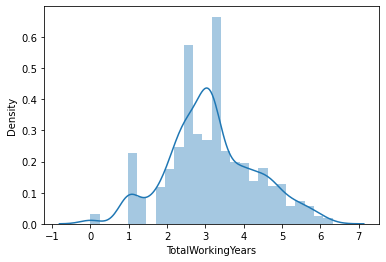

In [78]:
#Removing skewnes 
data_new['TotalWorkingYears']=np.sqrt(data_new['TotalWorkingYears'])
sns.distplot(data_new['TotalWorkingYears'])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

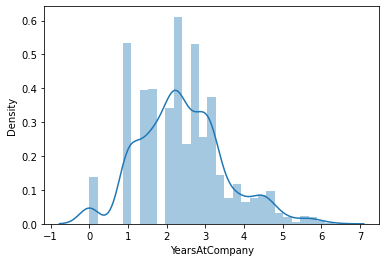

In [79]:
#Removing skewness
data_new['YearsAtCompany']=np.sqrt(data_new['YearsAtCompany'])
sns.distplot(data_new['YearsAtCompany'])

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

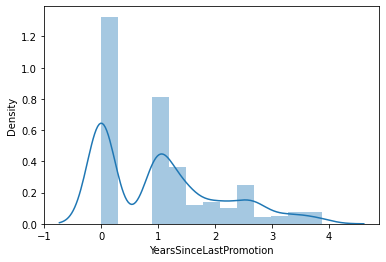

In [80]:
#Removing skewness
data_new['YearsSinceLastPromotion']=np.sqrt(data_new['YearsSinceLastPromotion'])
sns.distplot(data_new['YearsSinceLastPromotion'])

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

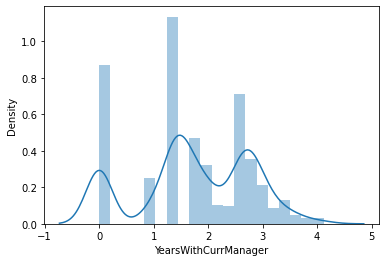

In [81]:
#Removing skewness
data_new['YearsWithCurrManager']=np.sqrt(data_new['YearsWithCurrManager'])
sns.distplot(data_new['YearsWithCurrManager'])

In [82]:
#Encoding the categorical varibales
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in data_new.columns:
    if data_new[i].dtypes=='object':
        data_new[i]=oe.fit_transform(data_new[i].values.reshape(-1,1))
data_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1.000000,2,1.0,1,2,...,3,1,0,2.828427,0,1,2.449490,4,0.000000,2.236068
1,49,0.0,1.0,279,1.0,2.828427,1,1.0,2,3,...,4,4,1,3.162278,3,3,3.162278,7,1.000000,2.645751
2,37,1.0,2.0,1373,1.0,1.414214,2,4.0,4,4,...,3,2,0,2.645751,3,3,0.000000,0,0.000000,0.000000
3,33,0.0,1.0,1392,1.0,1.732051,4,1.0,5,4,...,3,3,0,2.828427,3,3,2.828427,7,1.732051,0.000000
4,27,0.0,2.0,591,1.0,1.414214,1,3.0,7,1,...,3,4,1,2.449490,3,3,1.414214,2,1.414214,1.414214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,4.795832,2,3.0,2061,3,...,3,3,1,4.123106,3,3,2.236068,2,0.000000,1.732051
1466,39,0.0,2.0,613,1.0,2.449490,1,3.0,2062,4,...,3,1,1,3.000000,5,3,2.645751,7,1.000000,2.645751
1467,27,0.0,2.0,155,1.0,2.000000,3,1.0,2064,2,...,4,2,1,2.449490,0,3,2.449490,2,0.000000,1.732051
1468,49,0.0,1.0,1023,2.0,1.414214,3,3.0,2065,4,...,3,4,0,4.123106,3,2,3.000000,6,0.000000,2.828427


In [83]:
#Now divide the dataset into target and features
x=data_new.drop(columns=['Attrition'])
y=data_new['Attrition']

In [84]:
x.shape

(1470, 31)

In [85]:
y.shape

(1470,)

In [86]:
# Handiling the class having imbalance using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [87]:
x_over.shape

(2466, 31)

In [88]:
y_over.shape

(2466,)

In [89]:
# lets bring all feature into common scale
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x_over_scaled=scale.fit_transform(x_over)
x_over_scaled

array([[ 0.63907698,  0.65566181,  0.86600388, ...,  0.15431321,
        -1.00786159,  0.67960693],
       [ 1.53121613, -1.01480597, -1.29806268, ...,  1.05605819,
         0.01484013,  1.07822224],
       [ 0.1930074 ,  0.65566181,  1.57859445, ..., -1.04801343,
        -1.00786159, -1.49605138],
       ...,
       [-0.81064915,  0.08006326,  0.98696021, ..., -0.14626845,
        -0.65546591,  0.25352331],
       [ 0.1930074 , -0.04216093, -1.04300259, ...,  0.15431321,
         0.12246779,  0.14585679],
       [ 0.97362916,  0.65566181, -1.55838174, ..., -1.04801343,
        -1.00786159, -1.49605138]])

In [90]:

# To find the best random state using logistic Regressor model
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over_scaled,y_over,test_size=.30,random_state=i)
    mod= LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best accuracy is',maxAccu,'on random state',maxRS)

best accuracy is 0.8864864864864865 on random state 73


In [91]:
# Sending the data for train and test using Train_test_Split 
# 30 % data will go for testing and 70% data will go for training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 31)
(441, 31)
(1029,)
(441,)


# Model Building & Evaluation

Since the target variable are categorical values. we can build the classification models. Therefore,evalution criteria will be: Evaluation Matrics : accuracy_score,confusion_matrix,classifcation_report,Auc ROC curve

In [92]:
# Logistic regression Model
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8503401360544217
[[375   0]
 [ 66   0]]
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       375
         1.0       0.00      0.00      0.00        66

    accuracy                           0.85       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.72      0.85      0.78       441



In [93]:
# Gauusian Naive_bayes classifcation Model
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8163265306122449
[[324  51]
 [ 30  36]]
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       375
         1.0       0.41      0.55      0.47        66

    accuracy                           0.82       441
   macro avg       0.66      0.70      0.68       441
weighted avg       0.84      0.82      0.83       441



In [94]:
# Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7959183673469388
[[324  51]
 [ 39  27]]
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88       375
         1.0       0.35      0.41      0.38        66

    accuracy                           0.80       441
   macro avg       0.62      0.64      0.63       441
weighted avg       0.81      0.80      0.80       441



In [95]:
# Support Vector classifcation Model
sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.8503401360544217
[[375   0]
 [ 66   0]]
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       375
         1.0       0.00      0.00      0.00        66

    accuracy                           0.85       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.72      0.85      0.78       441



In [96]:
# KNeighbors classifcation Model
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8321995464852607
[[367   8]
 [ 66   0]]
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       375
         1.0       0.00      0.00      0.00        66

    accuracy                           0.83       441
   macro avg       0.42      0.49      0.45       441
weighted avg       0.72      0.83      0.77       441



In [97]:
# RandomForest classifcation Model
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=50,random_state=0)
#randomforsetclassifier(100)----Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8798185941043084
[[373   2]
 [ 51  15]]
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       375
         1.0       0.88      0.23      0.36        66

    accuracy                           0.88       441
   macro avg       0.88      0.61      0.65       441
weighted avg       0.88      0.88      0.85       441



In [98]:
# Ada Boost Classifer
from sklearn.ensemble import AdaBoostClassifier
ad= AdaBoostClassifier(n_estimators=100,random_state=42,algorithm='SAMME')
#Adabosstclassifier(100)----Default
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
ad.score(x_train,y_train)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predrf))

0.8979591836734694
[[369   6]
 [ 39  27]]
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       375
         1.0       0.88      0.23      0.36        66

    accuracy                           0.88       441
   macro avg       0.88      0.61      0.65       441
weighted avg       0.88      0.88      0.85       441



Random Forest & AdaBoost classifier have the best accuracy score among the 6 alogorithims used above.To find the best Model for prediction in our case.Lets do cross validation

# Cross Validation

In [99]:
gnbscores =cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.8537415  0.79251701 0.80272109 0.79251701 0.86054422]
0.8204081632653061 0.030300758437170165


In [100]:
lgscores =cross_val_score(lg,x,y,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.83673469 0.84013605 0.84013605 0.84353741 0.84353741]
0.8408163265306122 0.0025453451610707115


In [101]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.79251701 0.76870748 0.80612245 0.77210884 0.78231293]
0.7843537414965986 0.013707103183408101


In [102]:
svscores =cross_val_score(sv,x,y,cv=5)
print(svscores)
print(svscores.mean(),svscores.std())

[0.83673469 0.83673469 0.84013605 0.84013605 0.84013605]
0.8387755102040817 0.0016663195529137286


In [103]:
knnscores =cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.83333333 0.82993197 0.83673469 0.82653061 0.84353741]
0.834013605442177 0.0058519219503691405


In [104]:
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.8537415  0.85714286 0.8537415  0.86734694 0.86054422]
0.8585034013605443 0.005090690322141422


In [105]:
adscores =cross_val_score(ad,x,y,cv=5)
print(adscores)
print(adscores.mean(),adscores.std())

[0.84693878 0.88435374 0.86734694 0.8877551  0.84353741]
0.865986394557823 0.018329515082050964


It can be observed that the "Ada Boost Classifier" algorithim has the almost same accuracy score before and after the cross validation. So the best model with highet accuracy score and best on evalution with other matrix is "Ada Boost" is the best model for predicting the Attrition rate.

# AUC ROC Curve

In [106]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

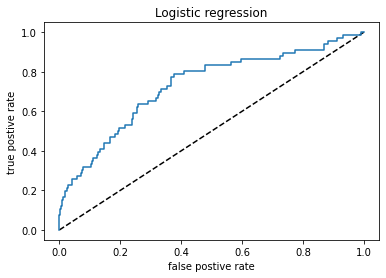

0.5

In [107]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Logistic regression')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

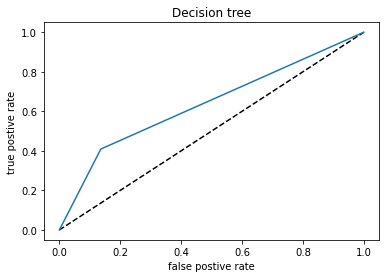

0.6365454545454546

In [108]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Decision tree')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

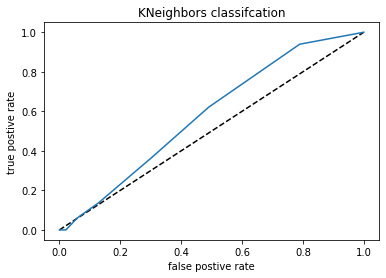

0.48933333333333334

In [109]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighbors classifcation Model')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('KNeighbors classifcation')
plt.show()
auc_score=roc_auc_score(y_test,knn.predict(x_test))
auc_score

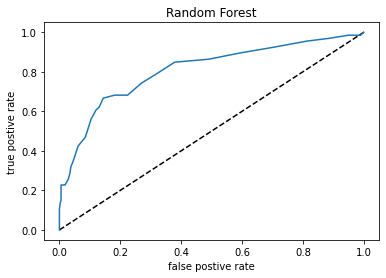

0.610969696969697

In [110]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest classifier')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Random Forest')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

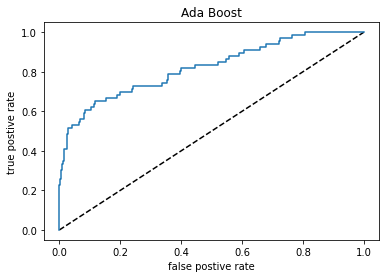

0.6965454545454546

In [111]:
y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Ada Boost classifcation Model')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Ada Boost')
plt.show()
auc_score=roc_auc_score(y_test,ad.predict(x_test))
auc_score

Observations: Ada Boost Classifier model has highest area under the curve. And AUC ROC score is 70%.It means our model can predict 70% effectively.

# HyperParameter tuning

In [112]:
from sklearn.model_selection import GridSearchCV 
parameter={'n_estimators':np.arange(40,100), 'algorithm':['SAMME', 'SAMME.R'],'learning_rate':np.arange(1,10)}

In [113]:
GCV=GridSearchCV(AdaBoostClassifier(),parameter,cv=5)

In [114]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [115]:
GCV.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 74}

In [116]:
from sklearn.ensemble import AdaBoostClassifier
final= AdaBoostClassifier(n_estimators=68,random_state=50,algorithm='SAMME',learning_rate= 1,)
#Adabosstclassifier(100)----Default
final.fit(x_train,y_train)
predad=final.predict(x_test)
final.score(x_train,y_train)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predrf))

0.8820861678004536
[[365  10]
 [ 42  24]]
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       375
         1.0       0.88      0.23      0.36        66

    accuracy                           0.88       441
   macro avg       0.88      0.61      0.65       441
weighted avg       0.88      0.88      0.85       441



In [117]:
#Saving the model to the local file system:
import pickle

In [70]:
filename='HR Analytics.pickle'
pickle.dump(final,open(filename,'wb'))